<a href="https://colab.research.google.com/github/maracoltrane/machine-learning-bootcamp/blob/main/supervised/03_classification/05_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Las losowy](#2)
4. [Wszystkie cechy](#3)
5. [Przeszukiwanie siatki](#4)



### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.3)
np.random.seed(42)

### <a name='1'></a> Załadowanie danych

In [2]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
data = data[:, [0, 1]]
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


### <a name='2'></a> Las losowy

In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(data, target)

RandomForestClassifier(random_state=42)

In [6]:
classifier.score(data, target)

0.9266666666666666

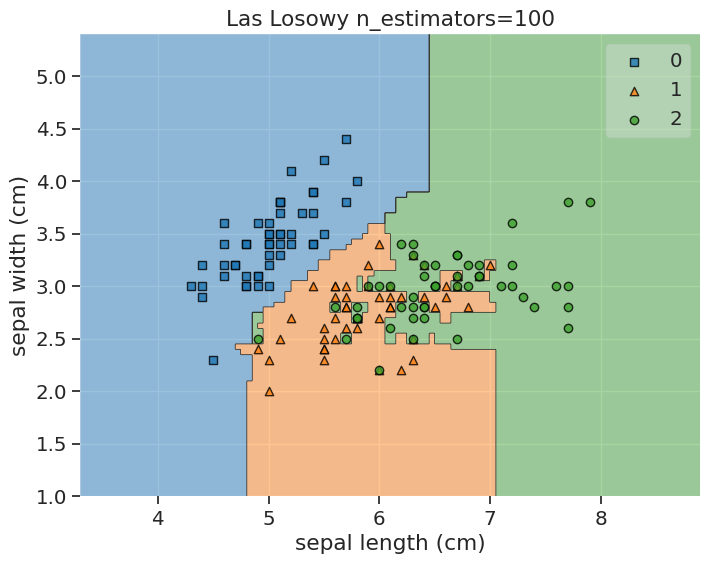

In [7]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Las Losowy n_estimators=100')
plt.show()

### <a name='3'></a> Wszystkie cechy

In [8]:
data = all_data['data']
targets = all_data['target']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


In [10]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [12]:
classifier.feature_importances_

array([0.10968334, 0.02954459, 0.43763486, 0.42313721])

In [13]:
features = pd.DataFrame(data={'feature': feature_names, 'feature_importance': classifier.feature_importances_})

px.bar(features, x='feature', y='feature_importance', width=700, height=400)